# **Theoretical**

# 1. What is Boosting in Machine Learning ?
### **Ans:-** Boosting is an **ensemble learning** technique in machine learning that combines multiple weak learners (typically decision trees) to create a strong predictive model. It works by sequentially training models, where each new model focuses on correcting the errors of the previous ones.

### **How Boosting Works:**
1. A weak learner (e.g., a small decision tree) is trained on the dataset.
2. Misclassified instances are given **higher weights** to make the next model focus more on them.
3. A new weak learner is trained on this weighted data.
4. Steps 2-3 are repeated for multiple iterations.
5. The final model is an aggregation of all weak learners, often using weighted voting or averaging.

### **Popular Boosting Algorithms:**
1. **AdaBoost (Adaptive Boosting)** – Adjusts weights of misclassified samples and combines multiple weak models.
2. **Gradient Boosting (GBM)** – Uses gradient descent to optimize the loss function while adding weak learners sequentially.
3. **XGBoost (Extreme Gradient Boosting)** – An optimized version of GBM with regularization and parallel computation.
4. **LightGBM (Light Gradient Boosting Machine)** – Uses histogram-based learning for efficiency in large datasets.
5. **CatBoost (Categorical Boosting)** – Designed for categorical features with efficient encoding and boosting.

### **Advantages of Boosting:**
- Reduces **bias and variance**, leading to higher accuracy.
- Works well with structured/tabular data.
- Handles complex patterns in data effectively.

### **Disadvantages of Boosting:**
- **Computationally expensive**, especially for large datasets.
- **Sensitive to noise** as it tries to correct all errors, including outliers.
- Can **overfit** if not tuned properly.



# 2. How does Boosting differ from Bagging ?
### **Ans:-** Boosting and Bagging are both **ensemble learning** techniques that combine multiple weak learners to improve model performance, but they work in fundamentally different ways.

### **Key Differences Between Boosting and Bagging**

| Feature        | Boosting | Bagging |
|--------------|---------|--------|
| **Goal** | Reduce bias and variance by focusing on misclassified instances. | Reduce variance by training multiple models independently. |
| **Training Process** | Sequential: Each new model learns from the mistakes of the previous one. | Parallel: All models are trained independently. |
| **Weight Adjustment** | Assigns higher weights to misclassified samples to improve learning. | Uses uniform sampling with replacement (Bootstrap Aggregating). |
| **Model Combination** | Weighted sum or boosting algorithms (e.g., AdaBoost, Gradient Boosting). | Majority voting (classification) or averaging (regression). |
| **Overfitting Risk** | Higher, as it focuses too much on difficult cases. | Lower, as it reduces variance. |
| **Performance** | Better for weak learners and small datasets. | Works well for high-variance models like decision trees. |

### **When to Use?**
- **Use Boosting** when you want to reduce both **bias and variance** (better accuracy but higher risk of overfitting).
- **Use Bagging** when you want to reduce **variance** (e.g., Random Forest) and make models more stable.

#### **Examples of Algorithms**
- **Boosting:** AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost
- **Bagging:** Random Forest, Bagged Decision Trees

Both techniques are powerful, and their choice depends on the problem and dataset characteristics.

# 3. What is the key idea behind AdaBoost ?
### **Ans:-** The key idea behind **AdaBoost (Adaptive Boosting)** is to combine multiple **weak learners** (typically decision stumps) into a **strong classifier** by **sequentially** focusing on misclassified samples.

### **How AdaBoost Works**
1. **Initialize Weights** – Assign equal weights to all training samples.
2. **Train a Weak Learner** – A simple model (like a shallow decision tree) is trained.
3. **Compute Errors** – Identify misclassified samples.
4. **Update Weights** – Increase the weight of misclassified samples so that the next weak learner focuses more on them.
5. **Repeat** – Steps 2-4 are repeated for multiple iterations.
6. **Final Model** – A weighted sum of all weak learners forms the final strong classifier.

### **Mathematical Concept**
- Each weak learner is assigned a weight **α**, which is based on its performance.
- If a model performs well, its **α** is high, meaning it contributes more to the final prediction.
- The final prediction is made using a weighted majority vote (classification) or weighted sum (regression).

### **Advantages of AdaBoost**
✔️ Improves accuracy by reducing bias.  
✔️ Works well with noisy and complex data.  
✔️ Less prone to overfitting than other boosting methods.  

### **Disadvantages of AdaBoost**
❌ Sensitive to outliers (as it gives higher weights to misclassified points).  
❌ Computationally expensive for large datasets.  

### **Use Cases**
- Face detection (Viola-Jones Algorithm)
- Spam filtering
- Fraud detection  



# 4.  Explain the working of AdaBoost with an example
### **Ans:-**  **Working of AdaBoost with an Example**  

#### **Step 1: Initialize Sample Weights**
- Suppose we have **4 training samples**:  

  | Sample | Feature (X) | Class Label (Y) |

  |---------------|-------------------|--------------------------|

  | 1             | 2                 | +1                       |

  | 2             | 3                 | -1                       |

  | 3             | 4                 | +1                       |

  | 4             | 5                 | -1                       |

- Assign equal weights to all samples:  
  weight(1) = weight(2) = weight(3) = weight(4) = 1 / 4 = 0.25

---

#### **Step 2: Train the First Weak Learner**
- Train a weak classifier (e.g., a decision stump).  
- Suppose it **misclassifies Sample 3** but correctly classifies the others.  
- Compute **error rate**:  
  error = sum of weights of misclassified samples  
  error = weight(3) = 0.25

---

#### **Step 3: Compute Model Weight (α)**
- Calculate the importance of this weak learner:  

  α = 0.5 * ln((1 - error) / error)  
  α = 0.5 * ln((1 - 0.25) / 0.25)  
  α = 0.5 * ln(0.75 / 0.25)  
  α = 0.5 * ln(3)  
  α ≈ 0.55  

---

#### **Step 4: Update Sample Weights**
- Increase the weight of the misclassified sample (Sample 3) so that the next weak learner focuses more on it:  

  new weight(i) = old weight(i) * exp(-α * Y(i) * h(X(i)))  

  where:  
  - Y(i) = true class label  
  - h(X(i)) = weak learner's prediction  
  - α = 0.55  

- If the sample was **correctly classified**, multiply its weight by **exp(-α)**.  
- If the sample was **misclassified**, multiply its weight by **exp(α)**.  
- Normalize the weights so they sum to 1.

---

#### **Step 5: Train the Next Weak Learner**
- Train a second weak learner using the updated sample weights.  
- The process repeats:  
  1. Train a new weak learner.  
  2. Compute its weighted error.  
  3. Calculate its α value.  
  4. Update sample weights.  

---

#### **Step 6: Final Strong Classifier**
- The final model is a **weighted combination** of all weak classifiers:  

  final_prediction(X) = sign(Σ α_t * h_t(X))  

  where **α_t** is the weight of the t-th weak learner, and **h_t(X)** is its prediction.

---

### **Key Takeaways**
✔ **Sequential Learning**: Each model improves upon the previous one.  
✔ **Focus on Misclassified Samples**: Incorrectly classified points get more importance.  
✔ **Weighted Voting**: Final prediction is a weighted sum of weak classifiers.  



# 5. What is Gradient Boosting, and how is it different from AdaBoost
### **Ans:-**  **Gradient Boosting vs. AdaBoost**  

Both **Gradient Boosting** and **AdaBoost** are boosting algorithms used to combine multiple weak learners into a strong predictive model. However, they differ in how they improve the weak models in each iteration.

---

### **1. What is Gradient Boosting?**  
**Gradient Boosting (GB)** is a boosting technique that builds models sequentially, like AdaBoost, but it minimizes the loss function using **gradient descent**. Instead of adjusting sample weights, it trains each new model to **correct the residual errors (difference between actual and predicted values) of the previous model**.  

#### **How Gradient Boosting Works:**
1. **Train an initial weak learner** (e.g., a small decision tree).
2. **Compute residual errors** (the difference between actual and predicted values).
3. **Train a new weak learner** to predict these residuals.
4. **Combine weak learners** by adding their predictions together.
5. **Repeat the process** until the error is minimized.

---

### **2. Key Differences Between AdaBoost and Gradient Boosting**
| Feature              | **AdaBoost** | **Gradient Boosting** |
|----------------------|-------------|----------------------|
| **Error Correction** | Increases weights of misclassified samples. | Fits new learners to correct residual errors. |
| **Weak Learner Contribution** | Weighted voting mechanism (higher weight for better models). | Models are added sequentially by minimizing residual errors. |
| **Loss Function Optimization** | Exponential loss (default). | Any differentiable loss function (e.g., squared error for regression, log loss for classification). |
| **Algorithm Type** | Works well for classification. | Works for both classification and regression. |
| **Computation Complexity** | Faster but less flexible. | Slower but more flexible due to gradient optimization. |

---

### **3. Example Analogy**
- **AdaBoost**: Think of a student learning from **focused tutoring**—if they get a question wrong, the tutor spends more time on those areas.  
- **Gradient Boosting**: Think of a student improving by **learning from past mistakes**—each new lesson is specifically designed to address past errors.  

---

### **4. When to Use Which?**
- **Use AdaBoost** if you have a **smaller dataset** and need a **fast, simple classifier**.
- **Use Gradient Boosting** if you have a **larger dataset** and need **better performance, especially for regression tasks**.



# 6. What is the loss function in Gradient Boosting
### **Ans:-**  **Loss Function in Gradient Boosting**  

In **Gradient Boosting**, the loss function measures how well the model's predictions match the actual values. The key idea is to **minimize the loss function** by iteratively improving weak learners using **gradient descent**.

---

### **1. General Loss Function**  
Gradient Boosting can use **any differentiable loss function**, making it flexible for both regression and classification tasks.

The general form of a loss function \( L(y, f(x)) \) measures the difference between the **true value** \( y \) and the **predicted value** \( f(x) \).

The model improves by adding a new weak learner that **moves in the direction of the negative gradient** of the loss function.

---

### **2. Common Loss Functions in Gradient Boosting**
| Task              | Loss Function | Formula |
|------------------|----------------------|--------------------------------|
| **Regression**   | **Mean Squared Error (MSE)** |Loss = (1/n) * Σ (y - f(x))² |
| **Regression**   | **Mean Absolute Error (MAE)** | Loss = (1/n) * Σ |y - f(x)||
| **Classification** (Binary) | **Log Loss (Cross-Entropy Loss)** | Loss = - Σ [ y * log(p) + (1 - y) * log(1 - p) ] |
| **Classification** (Multi-Class) | **Softmax Loss** |Loss = - Σ y_i * log(p_i) |

---

### **3. How the Loss Function is Minimized**
1. **Compute Residuals**: The difference between actual \( y \) and predicted \( f(x) \).
2. **Fit a New Weak Learner**: The new model predicts the negative gradient of the loss function.
3. **Update the Prediction**: The new model is added to the existing model to reduce error.
4. **Repeat** until the loss is minimized.

---

### **4. Key Takeaways**
✅ **Flexible**: Gradient Boosting can work with different loss functions.  
✅ **Gradient Descent Optimization**: The model learns by following the negative gradient of the loss.  
✅ **Better Performance**: More effective than AdaBoost for complex datasets.



# 7.  How does XGBoost improve over traditional Gradient Boosting
### **Ans:-**  **How XGBoost Improves Over Traditional Gradient Boosting**  

XGBoost (Extreme Gradient Boosting) enhances traditional Gradient Boosting with several key improvements:

---

### **1. Regularization for Better Generalization**  
XGBoost adds **L1 (Lasso) and L2 (Ridge) regularization** to prevent overfitting.

- **Traditional Gradient Boosting Loss Function:**  
  Loss = Σ L(y, f(x))  
- **XGBoost Loss Function with Regularization:**  
  Loss = Σ L(y, f(x)) + λ * Σ |w| + (α / 2) * Σ w²  

  Here:  
  - `λ` (L1) encourages sparsity in tree splits.  
  - `α` (L2) smooths the weights to prevent large fluctuations.  

---

### **2. Second-Order Approximation for Faster Convergence**  
XGBoost uses both **first-order (gradient) and second-order (Hessian) derivatives** to optimize loss.

- **Gradient Boosting (First Order Approximation):**  
  Loss ≈ Σ gradient * f(x)  

- **XGBoost (Second Order Taylor Expansion):**  
  Loss ≈ Σ [gradient * f(x) + (1/2) * hessian * f(x)²]  

  Here:  
  - `gradient` = first derivative of loss function  
  - `hessian` = second derivative (curvature) of loss function  

  Using second-order terms improves optimization and makes XGBoost **faster and more accurate**.

---

### **3. Tree Pruning for Efficient Trees**  
Instead of growing trees greedily, XGBoost uses a **depth-first approach with a pruning step**.

- **Traditional Gradient Boosting:**  
  - Stops growing a tree when a pre-set depth is reached.  
- **XGBoost:**  
  - Uses **Gain = left_gain + right_gain - root_gain**  
  - If Gain < γ (threshold), it **removes the split**, leading to **simpler, more efficient trees**.

---

### **4. Column Subsampling to Reduce Overfitting**  
XGBoost randomly selects a subset of features (columns) for training each tree.

- This helps in **reducing overfitting** and makes XGBoost **faster** than traditional Gradient Boosting.

---

### **5. Parallelized Training for Speed**  
- Traditional Gradient Boosting is **sequential**, making it slow.  
- XGBoost **processes multiple trees in parallel** using multi-core CPUs and GPUs.  

---

### **6. Handling Missing Values Automatically**  
- Traditional Gradient Boosting **ignores missing values** or requires preprocessing.  
- XGBoost **learns the best direction to handle missing values**, improving accuracy.

---

### **Conclusion**  
✔ **More Regularized** (L1 & L2 penalties).  
✔ **Second-Order Approximation** (better optimization).  
✔ **Efficient Tree Pruning** (removes weak splits).  
✔ **Column Subsampling** (reduces overfitting).  
✔ **Parallel Processing** (faster training).  
✔ **Built-in Missing Value Handling**.  

**XGBoost is significantly faster and more accurate** than traditional Gradient Boosting, making it the preferred choice for Kaggle competitions and real-world applications!

# 8. What is the difference between XGBoost and CatBoost
### **Ans:-**  **XGBoost vs. CatBoost: Key Differences**  

Both **XGBoost** and **CatBoost** are advanced Gradient Boosting algorithms, but they differ in how they handle data, speed, and feature types.

---

### **1. Handling of Categorical Features**  
- **XGBoost**: Requires **one-hot encoding** or **label encoding** for categorical data.  
- **CatBoost**: **Automatically handles categorical features** using **ordered boosting and target-based encoding**, making it more efficient for categorical data.  

---

### **2. Algorithm Optimization**  
- **XGBoost**: Uses **second-order Taylor expansion** for optimization.  
- **CatBoost**: Uses **ordered boosting**, which reduces overfitting by **shuffling data before training**.  

---

### **3. Training Speed**  
- **XGBoost**: Faster than traditional Gradient Boosting but can be slower than CatBoost for categorical-heavy datasets.  
- **CatBoost**: Uses **GPU-optimized training**, making it faster, especially when handling categorical variables.  

---

### **4. Overfitting Prevention**  
- **XGBoost**: Uses **L1 & L2 regularization** and **column subsampling** to prevent overfitting.  
- **CatBoost**: Uses **ordered boosting** and **feature-based regularization**, which reduces overfitting naturally.  

---

### **5. Performance on Different Data Types**  
- **XGBoost**: Works best on **numerical datasets** or datasets with pre-processed categorical features.  
- **CatBoost**: Works best on **datasets with many categorical features** due to its built-in encoding methods.  

---

### **6. Hyperparameter Tuning Complexity**  
- **XGBoost**: Requires more **manual tuning** to optimize performance.  
- **CatBoost**: Works well **out-of-the-box** with default parameters.  

---

### **7. Missing Values Handling**  
- **XGBoost**: Automatically learns the best direction for missing values.  
- **CatBoost**: Handles missing values **without needing imputation**.  

---

### **Conclusion: Which One to Use?**  
✔ **Use XGBoost** if you have **mostly numerical data** and want fine-tuned performance.  
✔ **Use CatBoost** if you have **many categorical features** and want an **easy-to-use, fast model**.  



# 9. What are some real-world applications of Boosting techniques
### **Ans:-**  **Real-World Applications of Boosting Techniques** 🚀  

Boosting techniques like **AdaBoost, Gradient Boosting (GBM), XGBoost, LightGBM, and CatBoost** are widely used across various industries due to their **high accuracy and robustness**.  

---

### **1. Finance & Banking 💰**  
✅ **Credit Scoring & Risk Assessment**  
   - Banks use **XGBoost** to predict loan defaults.  
   - Example: **Loss function** = (1/n) * Σ (y - f(x))² (MSE)  

✅ **Fraud Detection**  
   - **Gradient Boosting & XGBoost** analyze transaction patterns to detect fraud.  
   - Example: **Log Loss** = - Σ [ y * log(p) + (1 - y) * log(1 - p) ]  

---

### **2. Healthcare & Medical Diagnosis 🏥**  
✅ **Disease Prediction & Diagnosis**  
   - **CatBoost** helps in diagnosing diseases like cancer or diabetes from medical records.  
   - Example: **Binary Classification Loss (Log Loss)** = - Σ [ y * log(p) + (1 - y) * log(1 - p) ]  

✅ **Patient Readmission Prediction**  
   - Hospitals use **Boosting models** to predict patient readmissions and improve care plans.  

---

### **3. E-commerce & Retail 🛒**  
✅ **Customer Churn Prediction**  
   - **XGBoost** predicts customer churn based on purchase behavior.  

✅ **Product Recommendation Systems**  
   - **Gradient Boosting & LightGBM** improve recommendation engines (like Amazon, Netflix).  
   - Example: **Mean Squared Error (MSE)** = (1/n) * Σ (y - f(x))²  

---

### **4. Cybersecurity 🔐**  
✅ **Malware & Intrusion Detection**  
   - **AdaBoost & XGBoost** classify network traffic to detect cyber threats.  
   - Example: **Softmax Loss (Multi-class Classification)** = - Σ y_i * log(p_i)  

✅ **Email Spam Detection**  
   - **AdaBoost** filters spam emails by boosting weak classifiers.  

---

### **5. Marketing & Sales 📊**  
✅ **Lead Scoring & Conversion Rate Optimization**  
   - **XGBoost** predicts which leads are likely to convert into customers.  

✅ **Ad Click-Through Rate (CTR) Prediction**  
   - **Gradient Boosting** helps in personalized advertising (Google Ads, Facebook Ads).  

---

### **6. Manufacturing & Supply Chain 🏭**  
✅ **Demand Forecasting**  
   - **XGBoost & LightGBM** predict product demand to optimize inventory.  

✅ **Defect Detection & Quality Control**  
   - **Boosting models** analyze images in manufacturing for defect detection.  

---

### **7. Autonomous Vehicles & Traffic Analysis 🚗**  
✅ **Self-Driving Cars**  
   - **Gradient Boosting** helps in object detection & lane detection.  

✅ **Traffic Flow Prediction**  
   - **XGBoost** predicts congestion patterns for smart traffic systems.  

---

### **8. Natural Language Processing (NLP) 🗣️**  
✅ **Sentiment Analysis**  
   - **CatBoost** classifies customer reviews as positive, negative, or neutral.  

✅ **Chatbot & Voice Assistant Improvements**  
   - **Boosting models** improve chatbot responses based on user queries.  

---

### **9. Energy & Utilities ⚡**  
✅ **Power Consumption Forecasting**  
   - **Gradient Boosting** predicts electricity demand for smart grids.  

✅ **Fault Detection in Power Systems**  
   - **XGBoost** detects failures in energy distribution networks.  

---

### **Conclusion**  
Boosting techniques are widely used in **finance, healthcare, e-commerce, cybersecurity, NLP, and more** because they provide **high accuracy and robustness**. XGBoost, LightGBM, and CatBoost dominate **real-world ML applications** due to their speed and performance.

# 10.  How does regularization help in XGBoost
### **Ans:-** Regularization in XGBoost helps prevent overfitting and improves generalization by adding penalties to the model complexity. XGBoost includes both **L1 (Lasso) and L2 (Ridge) regularization** in its objective function.  

### **Objective Function with Regularization**  
XGBoost minimizes the following loss function:  

Loss = Σ L(yᵢ, ŷᵢ) + Ω(T)  

where:  
- L(yᵢ, ŷᵢ) is the primary loss function (e.g., Mean Squared Error for regression, Log Loss for classification).  
- Ω(T) is the regularization term that controls model complexity.  

The regularization term is:  

Ω(T) = γT + (1/2) * λ * Σ wⱼ²  

where:  
- γ (gamma) controls the penalty for adding new leaves.  
- λ (lambda) is **L2 regularization**, which smooths leaf weights and reduces overfitting.  

### **L1 and L2 Regularization in XGBoost**  

#### **L1 Regularization (Lasso) - Feature Selection**  
Penalty = α * Σ |wⱼ|  
- Helps in sparse feature selection by forcing some weights wⱼ to become zero.  
- Reduces model complexity by removing unnecessary features.  

#### **L2 Regularization (Ridge) - Prevents Overfitting**  
Penalty = λ * Σ wⱼ²  
- Smoothens weight values, reducing large fluctuations.  
- Helps in stabilizing the model.  

XGBoost **combines both L1 & L2 regularization**, making it more robust than traditional Gradient Boosting.

### **Tree Pruning with Regularization**  
XGBoost prunes trees dynamically by considering regularization.

**Gain Calculation for Splitting a Node:**  

Gain = (1/2) * ( (Σ g)² / (Σ h + λ) ) - γ  

where:  
- g = gradient of the loss function (first derivative).  
- h = hessian (second derivative).  
- λ = L2 regularization (prevents large weight updates).  
- γ = tree complexity penalty (controls splitting).  

If **Gain < γ**, XGBoost **removes the split**, preventing unnecessary complexity.  

### **How Regularization Helps in XGBoost?**  
✔ Prevents Overfitting → Regularization avoids unnecessary tree splits & controls model complexity.  
✔ Improves Generalization → Reduces variance, making the model more stable on unseen data.  
✔ Feature Selection (L1) → Automatically drops irrelevant features.  
✔ Smoothens Weights (L2) → Prevents extreme weight values in tree nodes.  
✔ Efficient Tree Pruning → Stops unnecessary growth, making the model faster & more efficient.  

### **Conclusion**  
Regularization in XGBoost (L1, L2, and tree complexity penalty) makes it **robust, efficient, and less prone to overfitting** compared to traditional Gradient Boosting.

# 11. What are some hyperparameters to tune in Gradient Boosting models
### **Ans:-**  **Hyperparameters to Tune in Gradient Boosting Models**  

Tuning hyperparameters in Gradient Boosting models helps optimize performance, prevent overfitting, and improve generalization. Below are some key hyperparameters:  

---

### **1. Learning Rate (η)**
- Controls the step size for updating weights.  
- Smaller values improve generalization but require more boosting iterations.  
- Typical range: **0.01 to 0.3**  

**Formula:**  
w_new = w_old - η * gradient  

---

### **2. Number of Estimators (n_estimators)**
- The total number of weak learners (trees) to fit.  
- More trees improve learning but may cause overfitting.  
- Typical range: **100 to 1000**  

---

### **3. Maximum Depth (max_depth)**
- Limits the depth of individual trees.  
- Deeper trees capture more patterns but may overfit.  
- Typical range: **3 to 10**  

---

### **4. Minimum Samples Split (min_samples_split)**
- The minimum number of samples required to split an internal node.  
- Higher values make the model conservative, preventing overfitting.  
- Typical range: **2 to 20**  

---

### **5. Minimum Samples Leaf (min_samples_leaf)**
- The minimum number of samples required in a leaf node.  
- Larger values prevent small leaf nodes and reduce variance.  
- Typical range: **1 to 50**  

---

### **6. Subsample Ratio (subsample)**
- Fraction of training data randomly sampled for each tree.  
- Reduces overfitting by adding randomness.  
- Typical range: **0.5 to 1.0**  

---

### **7. Column Subsampling (colsample_bytree)**
- Fraction of features randomly selected for each tree.  
- Helps with feature selection and reduces correlation between trees.  
- Typical range: **0.5 to 1.0**  

---

### **8. L1 Regularization (alpha)**
- Controls feature selection by adding L1 penalty to leaf weights.  
- Helps make the model sparse.  
- Typical range: **0 to 10**  

**Penalty Term:**  
Penalty = α * Σ |wⱼ|  

---

### **9. L2 Regularization (lambda)**
- Prevents overfitting by adding L2 penalty to leaf weights.  
- Smoothens large weight fluctuations.  
- Typical range: **0 to 10**  

**Penalty Term:**  
Penalty = λ * Σ wⱼ²  

---

### **10. Gamma (γ)**
- Minimum loss reduction required for a split.  
- Higher values make the model more conservative.  
- Typical range: **0 to 5**  

**Gain Calculation for Splitting:**  
Gain = (1/2) * ( (Σ g)² / (Σ h + λ) ) - γ  

where:  
- g = gradient (first derivative of loss function).  
- h = hessian (second derivative).  
- λ = L2 regularization.  

---

### **Summary of Hyperparameters & Their Effects**
| **Hyperparameter**       | **Effect**                                     |
|-------------------------|---------------------------------------------|
| Learning Rate (η)      | Controls step size for updates. Smaller = better generalization. |
| n_estimators           | More trees improve accuracy but increase risk of overfitting. |
| max_depth             | Deeper trees learn more but may overfit. |
| min_samples_split     | Higher values reduce splits, preventing overfitting. |
| min_samples_leaf      | Larger values create balanced trees. |
| subsample            | Lower values add randomness, reducing overfitting. |
| colsample_bytree     | Controls feature selection for trees. |
| alpha (L1)           | Prunes irrelevant features. |
| lambda (L2)          | Smoothens weights to prevent overfitting. |
| gamma (γ)            | Prevents unnecessary splits in trees. |

---

### **Best Practices for Tuning**
✔ **Use Grid Search or Random Search** for finding optimal values.  
✔ **Start with a small learning rate (0.1) and adjust n_estimators accordingly.**  
✔ **Balance tree depth, regularization, and subsampling to prevent overfitting.**  
✔ **Monitor validation loss to prevent excessive boosting.**  



# 12. What is the concept of Feature Importance in Boosting
### **Ans:-**  **Feature Importance in Boosting**  

Feature Importance in Boosting refers to **how much each feature contributes to the model’s decision-making process**. It helps in **feature selection, interpretation, and model optimization**.  

---

## **1. Types of Feature Importance in Boosting**  

### **(a) Split-Based Importance (Gini Importance)**
- Measures how often a feature is used for splitting across all trees.  
- Features appearing in early splits (closer to the root) get higher importance.  
- Used in **Gradient Boosting (GBM), XGBoost, and LightGBM**.  

**Formula:**  
Importance(f) = Σ (Gain for f in each split)  

where:  
- **Gain** = Improvement in the loss function due to the split.  
- **f** = Feature under evaluation.  

---

### **(b) Weight-Based Importance**
- Counts how many times a feature is used in splits across all trees.  
- Higher count = More important feature.  
- Used in **XGBoost** (`importance_type = "weight"`)  

**Formula:**  
Importance(f) = Count(f used in splits)  

---

### **(c) Permutation Importance**
- Measures the effect of shuffling feature values on model performance.  
- If shuffling increases error, the feature is important.  
- Used in **SHAP (SHapley Additive exPlanations)**.  

**Formula:**  
Importance(f) = Baseline Model Score - Shuffled Feature Score  

where:  
- **Baseline Model Score** = Original model performance.  
- **Shuffled Feature Score** = Performance after randomly shuffling feature f.  

---

### **(d) SHAP Values (Shapley Additive Explanations)**
- Measures how much each feature contributes to individual predictions.  
- More accurate but computationally expensive.  

**Formula:**  
SHAP(f) = Σ (Marginal Contribution of f in different coalitions)  

where:  
- **Coalitions** = Different subsets of features.  
- **Marginal Contribution** = Change in model prediction when f is added.  

---

## **2. How to Interpret Feature Importance?**
✔ **Higher importance = Feature has strong predictive power**  
✔ **Low importance = Feature can be removed for simplicity**  
✔ **Permutation Importance is useful for understanding non-linear effects**  
✔ **SHAP values give local (instance-wise) importance insights**  

---

## **3. Feature Importance in XGBoost, LightGBM, and CatBoost**
| **Boosting Model** | **Feature Importance Methods Available** |
|--------------------|----------------------------------|
| **XGBoost**       | Split Gain, Weight, Permutation, SHAP |
| **LightGBM**      | Split Gain, Weight, SHAP |
| **CatBoost**      | Loss-based Importance, SHAP |

---

### **4. Example: Extracting Feature Importance in XGBoost (Python)**
```python
import xgboost as xgb
import matplotlib.pyplot as plt

# Train an XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)

# Plot feature importance
xgb.plot_importance(model)
plt.show()
```

---

### **5. Why is Feature Importance Useful?**
✔ **Feature Selection** → Remove irrelevant features to improve efficiency.  
✔ **Model Interpretation** → Understand which features drive predictions.  
✔ **Bias Detection** → Identify and remove features that cause unwanted biases.  
✔ **Explainability** → Helps in explaining predictions in domains like finance, healthcare, etc.  



# 13. Why is CatBoost efficient for categorical data
### **Ans:-** ### **Why is CatBoost Efficient for Categorical Data?**  

CatBoost (**Categorical Boosting**) is specifically designed to handle **categorical features efficiently**. Unlike other boosting algorithms (e.g., XGBoost, LightGBM), which require manual encoding of categorical variables, CatBoost **natively processes categorical data** using innovative techniques, making it more efficient.  

---

### **1. Native Handling of Categorical Features**  
Most boosting algorithms require categorical features to be manually **one-hot encoded** or **label encoded**, which can lead to:  
❌ **Memory inefficiency** (One-hot encoding creates sparse matrices).  
❌ **Loss of feature relationships** (Label encoding introduces artificial ordering).  

✅ **CatBoost solves this by handling categorical data internally**, without needing manual preprocessing.  

---

### **2. Ordered Target Statistics (Categorical Encoding)**  
- Instead of using traditional **label encoding or one-hot encoding**, CatBoost applies **Ordered Target Statistics (OTS)** to encode categorical variables.  
- It avoids **target leakage** by using **a permutation-based encoding** method.  

**Formula for Target Encoding in CatBoost:**  
\[
E_{i} = \frac{\sum_{j < i} y_j + prior} {count(j < i) + \text{prior weight}}
\]
where:  
- \( E_{i} \) = Encoded value for the categorical feature.  
- \( y_j \) = Target variable for previous samples.  
- **Prior & Prior Weight** = Regularization to prevent overfitting.  

This ensures the model **learns patterns without biasing itself** to future values.  

---

### **3. CatBoost’s Ordered Boosting (Avoiding Target Leakage)**
- Traditional boosting methods may introduce **target leakage** when encoding categorical features.  
- **CatBoost applies ordered boosting**, meaning it **builds trees in a way that earlier splits do not use information from future data points**.  
- This makes the model **more stable and less prone to overfitting**.  

---

### **4. Efficient GPU Acceleration**  
- CatBoost is optimized for **fast training on both CPU and GPU**.  
- Its implementation uses **symmetric decision trees**, which lead to faster computation compared to other boosting models like XGBoost and LightGBM.  

---

### **5. Automatic Handling of Missing Values in Categorical Features**  
- Unlike XGBoost or LightGBM, which require imputation, **CatBoost naturally handles missing values in categorical data** using its ordered encoding strategy.  
- This reduces the need for additional preprocessing.  

---

### **6. Better Generalization and Reduced Overfitting**  
- **Ordered Target Statistics** and **Ordered Boosting** reduce **variance and overfitting**, making CatBoost more robust for categorical-heavy datasets.  
- It generalizes well even with **small datasets with high-cardinality categorical features**.  

---

### **7. Example: Using CatBoost for Categorical Features in Python**
```python
from catboost import CatBoostClassifier, Pool

# Sample dataset
data = [[1, "red"], [2, "blue"], [3, "green"], [4, "blue"], [5, "red"]]
labels = [0, 1, 0, 1, 0]

# Defining categorical column indices
cat_features = [1]

# Creating Pool (CatBoost data structure)
train_pool = Pool(data, label=labels, cat_features=cat_features)

# Train CatBoost model
model = CatBoostClassifier(iterations=100, depth=3, learning_rate=0.1, verbose=False)
model.fit(train_pool)

# Feature importance
print(model.get_feature_importance())
```

---

### **8. Summary: Why is CatBoost Efficient for Categorical Data?**
| Feature | Benefit |
|---------|---------|
| **Native categorical handling** | No need for manual encoding |
| **Ordered Target Statistics** | Reduces target leakage and overfitting |
| **Ordered Boosting** | Avoids future data leaks in tree splits |
| **GPU Acceleration** | Faster training |
| **Missing Value Handling** | No need for manual imputation |
| **Better Generalization** | Works well on small & high-cardinality categorical datasets |



# **Practical**

# 14. Train an AdaBoost Classifier on a sample dataset and print model accuracy

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load sample dataset (Iris dataset)
data = load_iris()
X, y = data.data, data.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost classifier (default base estimator: Decision Tree)
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.93


# 15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

In [3]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Generate sample regression dataset
X, y = make_regression(n_samples=500, n_features=5, noise=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost Regressor
model = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 29.04


# 16.  Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance4

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Print feature importance
feature_importance = model.feature_importances_
for feature, importance in zip(data.feature_names, feature_importance):
    print(f"{feature}: {importance:.4f}")


mean radius: 0.0000
mean texture: 0.0278
mean perimeter: 0.0002
mean area: 0.0004
mean smoothness: 0.0025
mean compactness: 0.0030
mean concavity: 0.0009
mean concave points: 0.4505
mean symmetry: 0.0005
mean fractal dimension: 0.0001
radius error: 0.0069
texture error: 0.0036
perimeter error: 0.0012
area error: 0.0084
smoothness error: 0.0006
compactness error: 0.0025
concavity error: 0.0131
concave points error: 0.0020
symmetry error: 0.0007
fractal dimension error: 0.0042
worst radius: 0.0756
worst texture: 0.0399
worst perimeter: 0.0514
worst area: 0.0382
worst smoothness: 0.0048
worst compactness: 0.0005
worst concavity: 0.0187
worst concave points: 0.2401
worst symmetry: 0.0015
worst fractal dimension: 0.0002


# 17.  Train a Gradient Boosting Regressor and evaluate using R-Squared Score

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate sample regression dataset
X, y = make_regression(n_samples=500, n_features=5, noise=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate using R-Squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-Squared Score: {r2:.2f}")


R-Squared Score: 0.95


# 18. 4 Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

In [10]:

from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings('ignore')
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

# Compare accuracies
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


XGBoost Accuracy: 0.96
Gradient Boosting Accuracy: 0.96


# 19. Train a CatBoost Classifier and evaluate using F1-Score.

In [16]:


from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost Classifier
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate using F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")


F1-Score: 0.97


# 20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

In [17]:
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate sample regression dataset
X, y = make_regression(n_samples=500, n_features=5, noise=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 812.20


# 21.  Train an AdaBoost Classifier and visualize feature importance

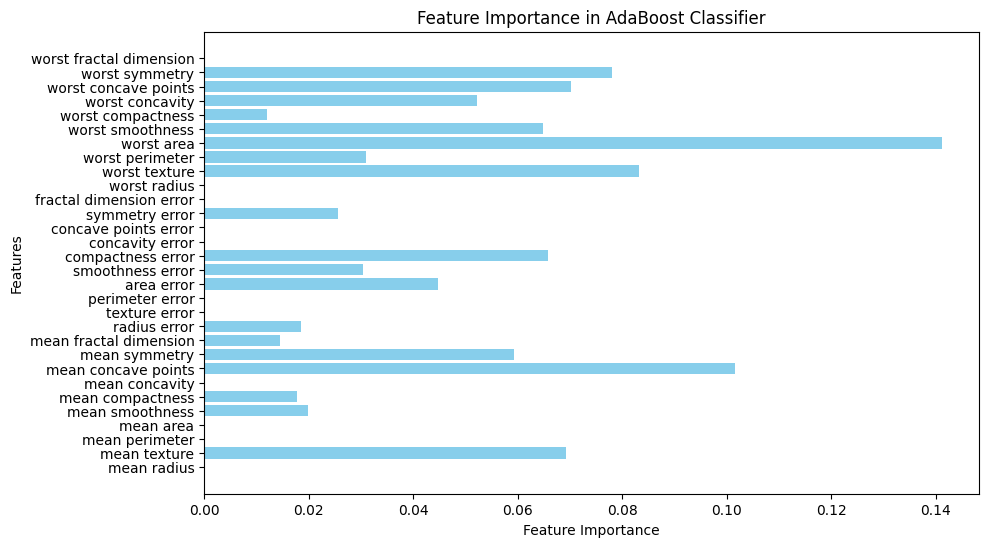

In [25]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(data.feature_names, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in AdaBoost Classifier")
plt.show()




# 22. Train a Gradient Boosting Regressor and plot learning curves

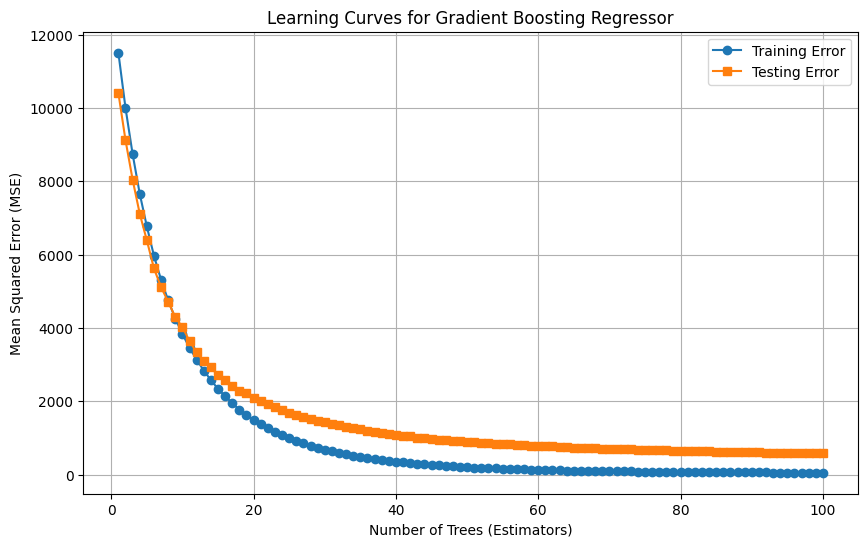

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate sample regression dataset
X, y = make_regression(n_samples=500, n_features=5, noise=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor with staged predictions to track learning
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Compute learning curves (MSE at each stage)
train_errors = []
test_errors = []

for y_train_pred, y_test_pred in zip(model.staged_predict(X_train), model.staged_predict(X_test)):
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_errors) + 1), train_errors, label="Training Error", marker='o')
plt.plot(range(1, len(test_errors) + 1), test_errors, label="Testing Error", marker='s')
plt.xlabel("Number of Trees (Estimators)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Learning Curves for Gradient Boosting Regressor")
plt.legend()
plt.grid()
plt.show()


# 23.  Train an XGBoost Classifier and visualize feature importance

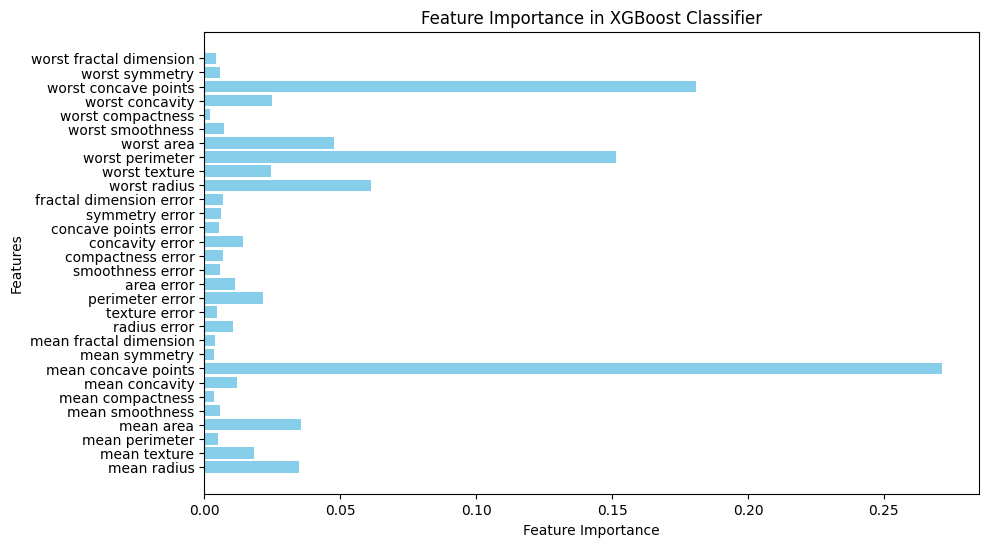

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Get feature importance and sort values
feature_importance = model.feature_importances_


# Visualize sorted feature importance
plt.figure(figsize=(10, 6))
plt.barh(data.feature_names, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost Classifier")
plt.show()


# 24. Train a CatBoost Classifier and plot the confusion matrix

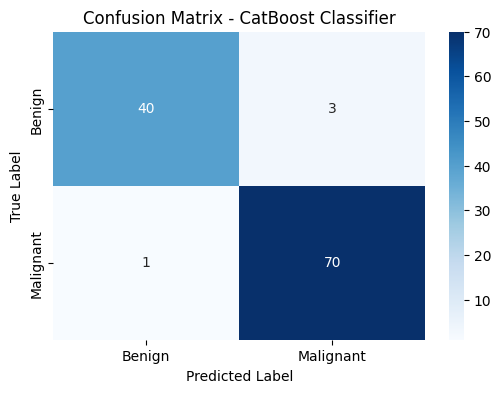

In [30]:

import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost Classifier
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


# 25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

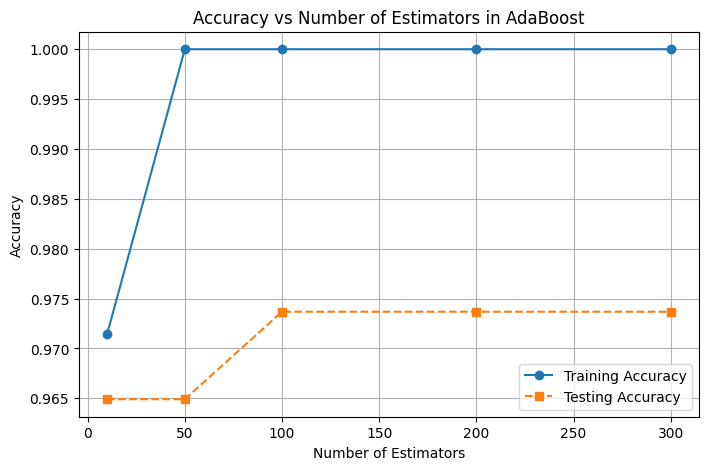

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different numbers of estimators
n_estimators_list = [10, 50, 100, 200, 300]

# Store accuracy results
train_accuracies = []
test_accuracies = []

# Train AdaBoost Classifier with different numbers of estimators
for n in n_estimators_list:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate accuracy
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, train_accuracies, marker='o', linestyle='-', label="Training Accuracy")
plt.plot(n_estimators_list, test_accuracies, marker='s', linestyle='--', label="Testing Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Estimators in AdaBoost")
plt.legend()
plt.grid()
plt.show()


# 26. Train a Gradient Boosting Classifier and visualize the ROC curve

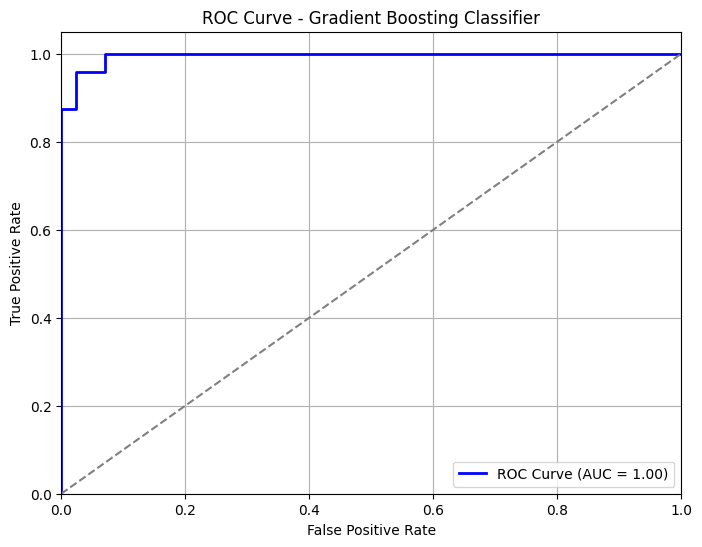

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# 27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV

In [36]:
import numpy as np
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost Regressor
model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Define hyperparameter grid
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameter and corresponding model
best_learning_rate = grid_search.best_params_['learning_rate']
best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Print results
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Test MSE: {mse:.4f}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Learning Rate: 0.2
Test MSE: 0.2160


# 28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting

Without Class Weighting:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       895
           1       0.85      0.72      0.78       105

    accuracy                           0.96      1000
   macro avg       0.91      0.85      0.88      1000
weighted avg       0.96      0.96      0.96      1000


With Class Weighting:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       895
           1       0.75      0.77      0.76       105

    accuracy                           0.95      1000
   macro avg       0.86      0.87      0.87      1000
weighted avg       0.95      0.95      0.95      1000



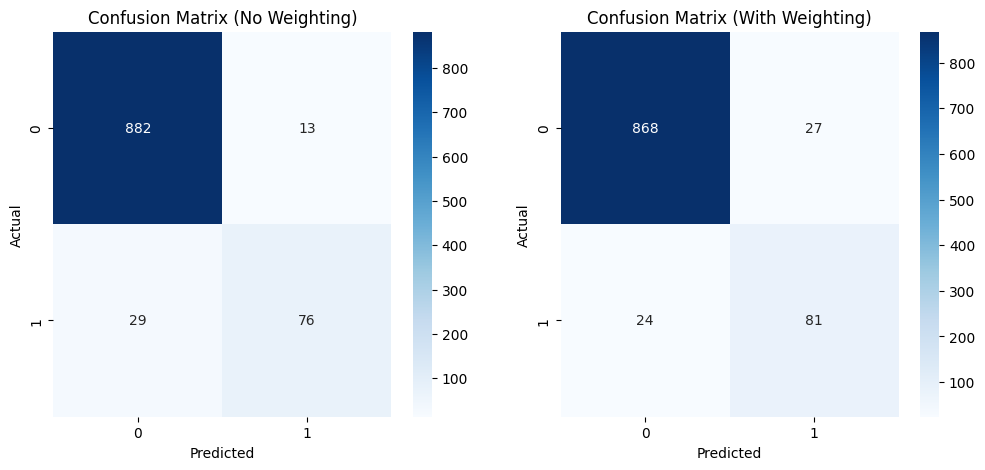

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Generate an imbalanced dataset
X, y = make_classification(n_samples=5000, n_features=20, weights=[0.9, 0.1], random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train CatBoostClassifier without class weighting
model_no_weight = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)
model_no_weight.fit(X_train, y_train)

# Train CatBoostClassifier with class weighting
class_weights = {0: 1, 1: 10}  # Higher weight for minority class
model_weighted = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, class_weights=class_weights, verbose=0, random_state=42)
model_weighted.fit(X_train, y_train)

# Predictions
y_pred_no_weight = model_no_weight.predict(X_test)
y_pred_weighted = model_weighted.predict(X_test)

# Evaluate performance
print("Without Class Weighting:")
print(classification_report(y_test, y_pred_no_weight))
print("\nWith Class Weighting:")
print(classification_report(y_test, y_pred_weighted))

# Confusion matrices
cm_no_weight = confusion_matrix(y_test, y_pred_no_weight)
cm_weighted = confusion_matrix(y_test, y_pred_weighted)

# Display confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_no_weight, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Confusion Matrix (No Weighting)")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(cm_weighted, annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title("Confusion Matrix (With Weighting)")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.show()


# 29. Train an AdaBoost Classifier and analyze the effect of different learning rates

Learning Rate: 0.001, Accuracy: 0.8680
Learning Rate: 0.01, Accuracy: 0.8680
Learning Rate: 0.1, Accuracy: 0.8680
Learning Rate: 0.5, Accuracy: 0.8680
Learning Rate: 1, Accuracy: 0.8950
Learning Rate: 2, Accuracy: 0.1430


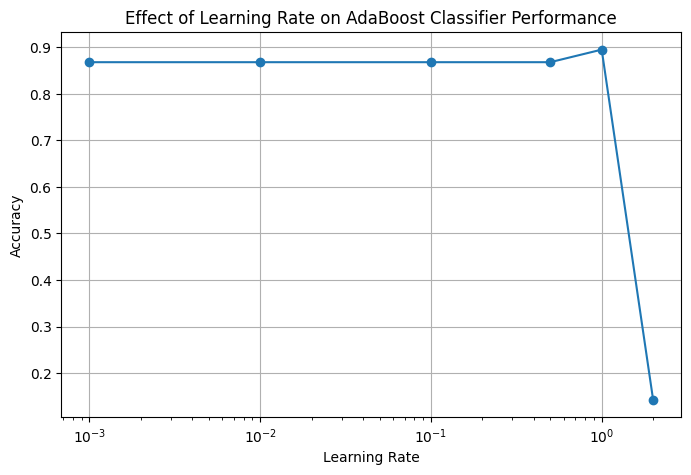

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=5000, n_features=20, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different learning rates to analyze
learning_rates = [0.001, 0.01, 0.1, 0.5, 1, 2]
accuracies = []

# Train and evaluate AdaBoost with different learning rates
for lr in learning_rates:
    model = AdaBoostClassifier(n_estimators=50, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Learning Rate: {lr}, Accuracy: {acc:.4f}")

# Plot the effect of learning rate on accuracy
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Effect of Learning Rate on AdaBoost Classifier Performance")
plt.grid()
plt.show()


# 30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss

In [44]:
import numpy as np
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Generate a synthetic multi-class dataset
X, y = make_classification(n_samples=5000, n_features=20, n_classes=3, n_informative=15, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost Classifier
model = xgb.XGBClassifier(objective="multi:softprob", num_class=3, n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities for log-loss evaluation
y_pred_prob = model.predict_proba(X_test)

# Compute log-loss
log_loss_value = log_loss(y_test, y_pred_prob)
print(f"Log-Loss: {log_loss_value:.4f}")


Log-Loss: 0.3550
